In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.image as mpimg

In [2]:
images_src=[]
for i in range(0,6):
    img = mpimg.imread("../recta/src/sample"+str(i)+".jpg")
    images_src.append(img)

In [3]:
images_src1=[]
for i in range(0,6):
    img = mpimg.imread("../recta/src1/sample"+str(i)+".jpg")
    images_src1.append(img)

In [4]:
images_pre=[]
for i in range(0,6):
    img = mpimg.imread("../recta/prepro/sample"+str(i)+".jpg")
    images_pre.append(img)

In [5]:
images_out =[]
for i in range(0,6):
    img = mpimg.imread("../recta/out/sample"+str(i)+".jpg")
    images_out.append(img)

In [6]:
def plot_image(imgs,t):
    fig, axs = plt.subplots(2, 3)
    k = 0
    for i in range(0,2):
        for j in range(0,3):
            axs[i, j].set_title(t+" "+str(k))
            axs[i,j].imshow(imgs[k])
            k +=1
    for ax in axs.flat:
        ax.set(xlabel="column", ylabel="row")
    for ax in axs.flat:
        ax.label_outer()

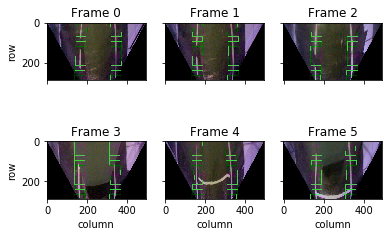

In [7]:
plot_image(images_src,"Frame")

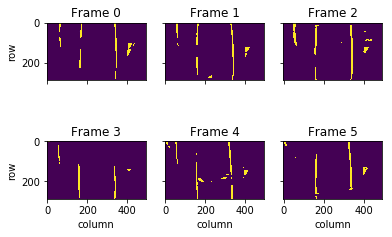

In [8]:
plot_image(images_pre,"Frame")

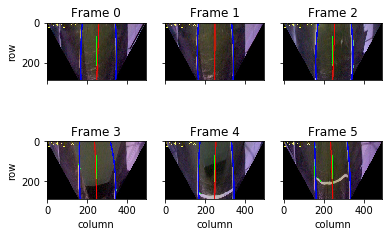

In [9]:
plot_image(images_out,"Frame")

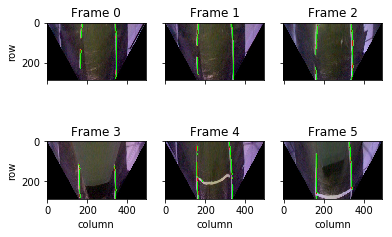

In [10]:
plot_image(images_src1,"Frame")

In [11]:
data_left=[]
for i in range(0,6):
    source = "../recta/csv/dataL"+str(i)+".csv"
    aux = pd.read_csv(source)
    data_left.append(aux)

In [12]:
def plot_data(df,r,c,col):
    fig, axs = plt.subplots(2, 3)
    k = 0
    for i in range(0,2):
        for j in range(0,3):
            axs[i, j].set_title("Frame "+str(k))
            sns.lineplot(df[k][c],df[k][r], color=col,ax=axs[i,j])
            k +=1
    for ax in axs.flat:
        ax.set(xlabel="column", ylabel="row")
    for ax in axs.flat:
        ax.label_outer()

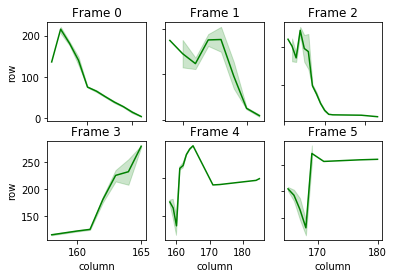

In [13]:
plot_data(data_left,"row_data","col_data","g")

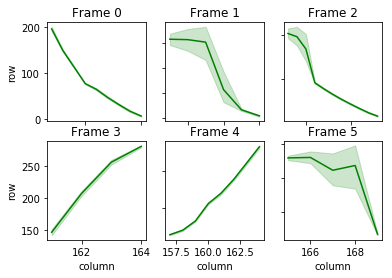

In [14]:
plot_data(data_left,"row_model","col_model","g")

In [15]:
def distribution_variable(df,col,c):
    fig, axs = plt.subplots(2, 3)
    k = 0
    for i in range(0,2):
        for j in range(0,3):
            axs[i, j].set_title("Frame "+str(k))
            sns.distplot(df[k][col], hist=False, color=c, kde_kws={"shade": True}, ax=axs[i,j])
            k +=1
    for ax in axs.flat:
        ax.set(xlabel="column",ylabel="Density")
    for ax in axs.flat:
        ax.label_outer()

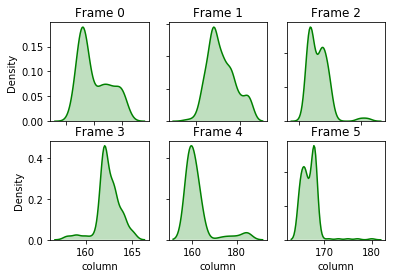

In [16]:
distribution_variable(data_left,"col_data","g")

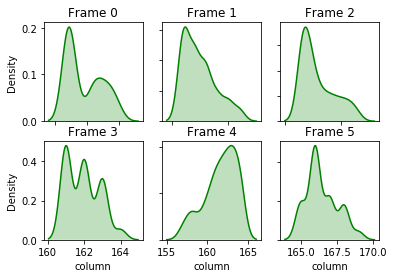

In [17]:
distribution_variable(data_left,"col_model","g")

In [22]:
for i in range(0,6):    
    data_left[i]["absolute_error"]= abs(data_left[i]["col_model"]-data_left[i]["col_data"])

In [23]:
MAE_LEFT = []
for i in range(0,6):    
    aux = data_left[i]["absolute_error"].sum()/data_left[i]["absolute_error"].count()
    MAE_LEFT.append(aux)
MAE_LEFT

[0.6081871345029239,
 0.5198019801980198,
 0.9162790697674419,
 0.7633136094674556,
 3.6055045871559632,
 0.9009433962264151]

In [24]:
for i in range(0,6):    
    data_left[i]["quadratic_error"]= pow((data_left[i]["col_model"]-data_left[i]["col_data"]),2)

In [25]:
MSE_LEFT = []
for i in range(0,6):    
    aux =  np.sqrt(data_left[i]["quadratic_error"].sum()/data_left[i]["quadratic_error"].count())
    MSE_LEFT.append(aux)
MSE_LEFT 

[0.787326514818136,
 0.7278069595002714,
 1.6066721348293838,
 1.095985142213462,
 6.277234241668112,
 1.6583123951777]

In [26]:
left_errors = pd.DataFrame()
left_errors["RMSE_LEFT"] = MSE_LEFT 
left_errors["MAE_LEFT"] = MAE_LEFT
left_errors
#writer = pd.ExcelWriter('../test1/errorL.xlsx')
#left_errors.to_excel(writer)
#writer.save()

,RMSE_LEFT,MAE_LEFT
0,0.787327,0.608187
1,0.727807,0.519802
2,1.606672,0.916279
3,1.095985,0.763314
4,6.277234,3.605505
5,1.658312,0.900943


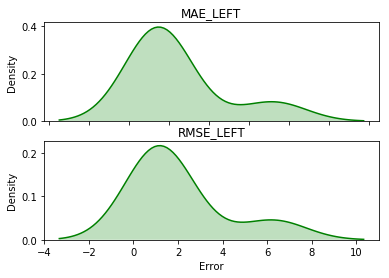

In [50]:
fig, axes = plt.subplots(2)
axes[0].set_title("MAE_LEFT")
sns.distplot(left_errors["MAE_LEFT"], hist=False, color="g", kde_kws={"shade": True}, ax=axes[0])
axes[1].set_title("RMSE_LEFT")
sns.distplot(left_errors["RMSE_LEFT"], hist=False, color="g", kde_kws={"shade": True}, ax=axes[1])
for ax in axes.flat:
    ax.set(xlabel="Error",ylabel="Density")
for ax in axes.flat:
    ax.label_outer()

In [28]:
data_right=[]
for i in range(0,6):
    source = "../recta/csv/dataR"+str(i)+".csv"
    aux = pd.read_csv(source)
    data_right.append(aux)

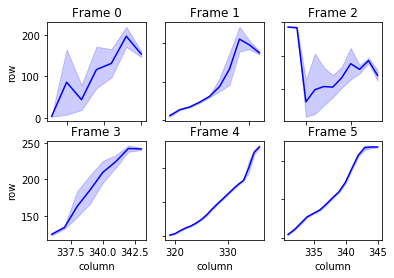

In [29]:
plot_data(data_right,"row_data","col_data","b")

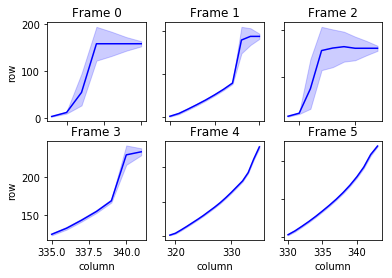

In [30]:
plot_data(data_right,"row_model","col_model","b")

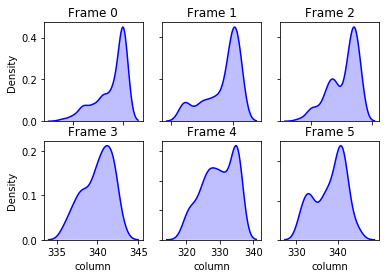

In [31]:
distribution_variable(data_right,"col_data","b")

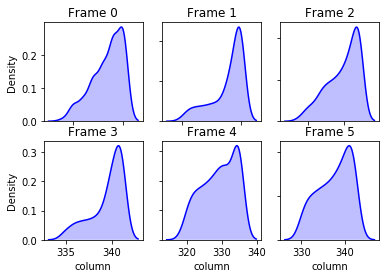

In [32]:
distribution_variable(data_right,"col_model","b")

In [33]:
for i in range(0,6):    
    data_right[i]["absolute_error"]= abs(data_right[i]["col_model"]-data_right[i]["col_data"])

In [34]:
MAE_RIGHT = []
for i in range(0,6):    
    aux = data_right[i]["absolute_error"].sum()/data_right[i]["absolute_error"].count()
    MAE_RIGHT.append(aux)
MAE_RIGHT

[0.49642857142857144,
 0.583916083916084,
 0.8864468864468864,
 0.5757575757575758,
 0.5122950819672131,
 0.5352697095435685]

In [35]:
for i in range(0,6):    
    data_right[i]["quadratic_error"]= pow((data_right[i]["col_model"]-data_right[i]["col_data"]),2)

In [36]:
MSE_RIGHT = []
for i in range(0,6):    
    aux =  np.sqrt(data_right[i]["quadratic_error"].sum()/data_right[i]["quadratic_error"].count())
    MSE_RIGHT.append(aux)
MSE_RIGHT

[0.7096276689725596,
 0.7777500272549689,
 1.228477720252797,
 0.8275557291496959,
 0.7214511787215324,
 0.8173431302281314]

In [40]:
right_errors = pd.DataFrame()
right_errors["RMSE_RIGHT"] = MSE_RIGHT
right_errors["MAE_RIGHT"] = MAE_RIGHT
right_errors
#writer = pd.ExcelWriter('../test1/errorR.xlsx')
#right_errors.to_excel(writer)
#writer.save()

,RMSE_RIGHT,MAE_RIGHT
0,0.709628,0.496429
1,0.777750,0.583916
2,1.228478,0.886447
3,0.827556,0.575758
4,0.721451,0.512295
5,0.817343,0.535270


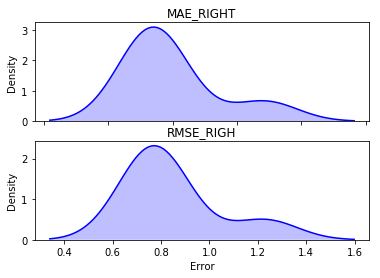

In [51]:
fig, axes = plt.subplots(2)
axes[0].set_title("MAE_RIGHT")
sns.distplot(right_errors["MAE_RIGHT"], hist=False, color="b", kde_kws={"shade": True}, ax=axes[0])
axes[1].set_title("RMSE_RIGH")
sns.distplot(right_errors["RMSE_RIGHT"], hist=False, color="b", kde_kws={"shade": True}, ax=axes[1])
for ax in axes.flat:
    ax.set(xlabel="Error",ylabel="Density")
for ax in axes.flat:
    ax.label_outer()

# for i in range(0,6):
    output = "../test1/data_right"+str(i)+".xlsx"
    writer = pd.ExcelWriter(output)
    data_right[i].to_excel(writer)
    writer.save()

In [42]:
mean_right_errors_MSE = right_errors["RMSE_RIGHT"].mean() 
mean_right_errors_MAE = right_errors["MAE_RIGHT"].mean() 
print(mean_right_errors_MAE)
print(mean_right_errors_MSE)

0.5983523181766498
0.8470342424299475


In [43]:
mean_left_errors_MSE = left_errors["RMSE_LEFT"].mean() 
mean_left_errors_MAE = left_errors["MAE_LEFT"].mean() 
print(mean_left_errors_MAE)
print(mean_left_errors_MSE)

1.21900496288637
2.025556231367844


In [44]:
std_left=[]
for i in range(0,6):
    aux = np.std(data_left[i]["col_data"])
    std_left.append(aux)
std_left

[2.765605834190478,
 1.5135243005165437,
 3.3575596999895705,
 1.2399238505132486,
 6.5122882427546775,
 1.8270737935850898]

In [45]:
std_right = []
for i in range(0,6):
    aux = np.std(data_right[i]["col_data"])
    std_right.append(aux)
std_right

[1.5252299926936412,
 2.8480882929684586,
 2.3988003907542774,
 1.8269083510260358,
 4.888069584986488,
 3.7896972260775383]

In [46]:
mean_left = []
for i in range(0,6):
    aux = np.mean(data_left[i]["col_data"])
    mean_left.append(aux)
mean_left

[170.1345029239766,
 162.92079207920793,
 166.30697674418604,
 162.44970414201183,
 162.11009174311926,
 166.96226415094338]

In [47]:
mean_right = []
for i in range(0,6):
    aux = np.mean(data_right[i]["col_data"])
    mean_right.append(aux)
mean_right

[343.87142857142857,
 338.3881118881119,
 345.31501831501834,
 340.04242424242426,
 329.69262295081967,
 338.10788381742736]